In [1]:
#pip install imblearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.utils.class_weight import compute_class_weight
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('sentiment_analysis_nepali_final.csv')

In [4]:
df

,Unnamed: 0,Sentences,Sentiment
0,0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1
4,4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1
...,...,...,...
35784,33469,कोरोना भाइरसलाई विश्व स्वास्थ्य संगठनले दियो न...,0
35785,33470,डब्ल्युएचओले दियाेको कोरोनाको नयाँ नाम कोभिड,0
35786,33471,कोरोना भाइरस संक्रमणको औपचारिक नाम अब कोभिड,0
35787,33472,विश्व स्वास्थ्य संगठन डब्लुएचओ ले नोबल कोरोना ...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35789 entries, 0 to 35788
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35789 non-null  int64 
 1   Sentences   35789 non-null  object
 2   Sentiment   35789 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 838.9+ KB


In [6]:
df['Sentiment'].value_counts()

 1    15880
-1    14408
 0     5501
Name: Sentiment, dtype: int64

In [7]:
df = df[['Sentences','Sentiment']]

In [8]:
df.head()

,Sentences,Sentiment
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1


<Axes: title={'center': 'count of review'}>

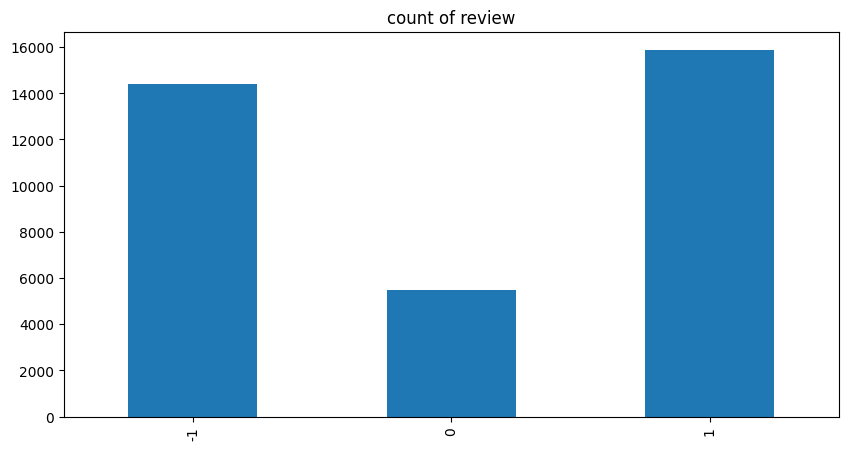

In [9]:
df['Sentiment'].value_counts().sort_index().plot(kind='bar', title='count of review', figsize=(10, 5))

In [10]:
df.isnull().sum()

Sentences    0
Sentiment    0
dtype: int64

In [11]:
df.duplicated().sum()

38

In [12]:
df = df.drop_duplicates()

In [13]:
df

,Sentences,Sentiment
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1
...,...,...
35784,कोरोना भाइरसलाई विश्व स्वास्थ्य संगठनले दियो न...,0
35785,डब्ल्युएचओले दियाेको कोरोनाको नयाँ नाम कोभिड,0
35786,कोरोना भाइरस संक्रमणको औपचारिक नाम अब कोभिड,0
35787,विश्व स्वास्थ्य संगठन डब्लुएचओ ले नोबल कोरोना ...,0


In [14]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [15]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
#pip install nepali-stemmer

In [18]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove digits
    text = re.sub(r"\d+", "", text) 
    text = re.sub(r"\|", "", text)
    text = re.sub('[।(),०-९<<?!,—,–,/,’,‘,:,\u200d]', '', text)

    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words("nepali"))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a string
    text = " ".join(tokens)
    return text

In [19]:
# Apply the preprocessing function to the text column
df["Sentences"] = df["Sentences"].apply(preprocess_text)


In [20]:
df

,Sentences,Sentiment
0,शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे सामुदायि...,1
1,सरकारी स्कूलकलेजमा पढेर करीब बर्ष बढी बिभिन्न ...,1
2,कति शिव मन्दिर देख्न पाइयो कुन ठाउको होला धन्य...,1
3,मारुनी वितिकै सामान्य नाचनीमा आधारित कथा होला ...,1
4,फ्लिम हेरिसकेपछी थाहा भयो दर्सकहरुले साम्राज्ञ...,1
...,...,...
35784,कोरोना भाइरसलाई विश्व स्वास्थ्य संगठनले दियो न...,0
35785,डब्ल्युएचओले दियाेको कोरोनाको नाम कोभिड,0
35786,कोरोना भाइरस संक्रमणको औपचारिक नाम कोभिड,0
35787,विश्व स्वास्थ्य संगठन डब्लुएचओ नोबल कोरोना भाइ...,0


In [21]:
df

,Sentences,Sentiment
0,शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे सामुदायि...,1
1,सरकारी स्कूलकलेजमा पढेर करीब बर्ष बढी बिभिन्न ...,1
2,कति शिव मन्दिर देख्न पाइयो कुन ठाउको होला धन्य...,1
3,मारुनी वितिकै सामान्य नाचनीमा आधारित कथा होला ...,1
4,फ्लिम हेरिसकेपछी थाहा भयो दर्सकहरुले साम्राज्ञ...,1
...,...,...
35784,कोरोना भाइरसलाई विश्व स्वास्थ्य संगठनले दियो न...,0
35785,डब्ल्युएचओले दियाेको कोरोनाको नाम कोभिड,0
35786,कोरोना भाइरस संक्रमणको औपचारिक नाम कोभिड,0
35787,विश्व स्वास्थ्य संगठन डब्लुएचओ नोबल कोरोना भाइ...,0


In [22]:
df

,Sentences,Sentiment
0,शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे सामुदायि...,1
1,सरकारी स्कूलकलेजमा पढेर करीब बर्ष बढी बिभिन्न ...,1
2,कति शिव मन्दिर देख्न पाइयो कुन ठाउको होला धन्य...,1
3,मारुनी वितिकै सामान्य नाचनीमा आधारित कथा होला ...,1
4,फ्लिम हेरिसकेपछी थाहा भयो दर्सकहरुले साम्राज्ञ...,1
...,...,...
35784,कोरोना भाइरसलाई विश्व स्वास्थ्य संगठनले दियो न...,0
35785,डब्ल्युएचओले दियाेको कोरोनाको नाम कोभिड,0
35786,कोरोना भाइरस संक्रमणको औपचारिक नाम कोभिड,0
35787,विश्व स्वास्थ्य संगठन डब्लुएचओ नोबल कोरोना भाइ...,0


In [23]:
#df['Sentences'] = df['Sentences'].apply(preprocess_text)

In [24]:
df.head()

,Sentences,Sentiment
0,शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे सामुदायि...,1
1,सरकारी स्कूलकलेजमा पढेर करीब बर्ष बढी बिभिन्न ...,1
2,कति शिव मन्दिर देख्न पाइयो कुन ठाउको होला धन्य...,1
3,मारुनी वितिकै सामान्य नाचनीमा आधारित कथा होला ...,1
4,फ्लिम हेरिसकेपछी थाहा भयो दर्सकहरुले साम्राज्ञ...,1


In [25]:
from sklearn.naive_bayes import ComplementNB


In [29]:
import numpy as np



In [30]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentences'], df['Sentiment'], test_size=0.25, random_state=42)

In [31]:
num_unique_values_per_column = df.apply(lambda x: x.nunique(), axis=0)
total_unique_values = sum([value for value in num_unique_values_per_column])
print("Total Unique Values Across All Columns:", total_unique_values)

Total Unique Values Across All Columns: 35423


In [32]:
unique, count = np.unique(y_train, return_counts=True)
y_train_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_value_count

{-1: 10740, 0: 4100, 1: 11973}

In [33]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Hyperparameter tuning for Multinomial Naive Bayes
nb_params = {'alpha': [0.1, 0.01, 0.001]}
nb_model = MultinomialNB()
nb_grid = GridSearchCV(nb_model, nb_params, cv=5)
nb_grid.fit(X_train_vec, y_train)
best_alpha_nb = nb_grid.best_params_['alpha']
print(best_alpha_nb)

0.1


In [38]:
# Train Multinomial Naive Bayes with the optimal alpha
model = MultinomialNB(alpha=best_alpha_nb)
model.fit(X_train_vec, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

In [39]:
predictions = model.predict(X_test_vec)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.67      0.63      0.65      3655
           0       0.46      0.08      0.13      1394
           1       0.60      0.81      0.69      3889

    accuracy                           0.62      8938
   macro avg       0.58      0.51      0.49      8938
weighted avg       0.61      0.62      0.59      8938

[[2312   71 1272]
 [ 434  108  852]
 [ 689   56 3144]]


In [ ]:
# Sample class frequencies
class_frequencies = [14408, 5501, 15880]  # actual class frequencies

# Compute total number of samples
total_samples = sum(class_frequencies)
print(total_samples)

# Compute class weights
num_classes = len(class_frequencies)
#print(num_classes)

class_weights = [total_samples / (class_freq * num_classes) for class_freq in class_frequencies]
#print(class_weights)

# Normalize class weights
sum_weights = sum(class_weights)
class_weights_normalized = [weight / sum_weights for weight in class_weights]

print("Class Weights:", class_weights_normalized)

In [ ]:
#Train Naive Bayes model
first_model = MultinomialNB(class_prior=class_weights_normalized)
first_model.fit(X_train_vec, y_train)

In [ ]:
predictions = first_model.predict(X_test_vec)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

In [ ]:
#model = ComplementNB()
#model.fit(X_train_vec, y_train)


In [ ]:
# Apply SMOTE to balance the dataset
#sm = SMOTE(random_state=42)
#X_train_res, y_train_res = sm.fit_resample(X_train_vec, y_train)
# Train the MNB classifier on the balanced data
#model = MultinomialNB()
#model.fit(X_train_res, y_train_res)


In [40]:
# Hyperparameter tuning for Support Vector Machine (SVM) with RBF kernel
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
svm_model = SVC(kernel='rbf')
svm_grid = GridSearchCV(svm_model, svm_params, cv=5)
svm_grid.fit(X_train_vec, y_train)
best_params_svm = svm_grid.best_params_

In [41]:
# Train SVM with the optimal hyperparameters
model_svm = SVC(C=best_params_svm['C'], gamma=best_params_svm['gamma'], kernel='rbf')
model_svm.fit(X_train_vec, y_train)

SVC(C=10, gamma=0.1)

In [42]:
predictions = model_svm.predict(X_test_vec)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.67      0.71      0.69      3655
           0       0.49      0.15      0.23      1394
           1       0.65      0.77      0.71      3889

    accuracy                           0.65      8938
   macro avg       0.60      0.55      0.54      8938
weighted avg       0.63      0.65      0.63      8938

[[2600  113  942]
 [ 509  211  674]
 [ 768  111 3010]]


In [ ]:
# Evaluate models on the test set
accuracy_nb = model_nb.score(X_test_vec, y_test)
accuracy_svm = model_svm.score(X_test_vec, y_test)

print(f"Accuracy for Multinomial Naive Bayes: {accuracy_nb}")
print(f"Accuracy for SVM with RBF kernel: {accuracy_svm}")

In [ ]:
#model = LinearSVC()
#model.fit(X_train_vec, y_train)

In [ ]:
#predictions = model.predict(X_test_vec)
#print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))

In [ ]:
#second_model = LinearSVC(class_weight='balanced')
#second_model.fit(X_train_vec, y_train)

In [ ]:
#predictions = second_model.predict(X_test_vec)
#print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))

In [ ]:
#model = SVC() #RBF kernwl
#model.fit(X_train_vec, y_train)

In [ ]:
#predictions = model.predict(X_test_vec)
#print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))

In [43]:
third_model = SVC(class_weight='balanced') #RBF kernwl
third_model.fit(X_train_vec, y_train)

SVC(class_weight='balanced')

In [ ]:
predictions = third_model.predict(X_test_vec)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

In [ ]:
if predictions ==1:
    print("Positive")
elif predictions == -1:
    print("Negative")
else:
    print('Neutral')

In [ ]:
#new_text = ["म यो समिति बोलाउँछु।", "यो मलाई मन परेन।"]
#new_predictions = model.predict(new_text)
#print("Predictions for new text:", new_predictions)
new_test = ["कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको होला ?धन्यवाद सम्पुर्ण टिमलाई विशेष केदार अनि काली आम"]
new_test_vec = vectorizer.transform(new_test)
new_predictions = model.predict(new_test_vec)
print("result:", new_predictions)

In [ ]:
if new_predictions ==1:
    print("Positive")
elif new_predictions == -1:
    print("Negative")
else:
    print('Neutral')

In [ ]:

new_test = ["म यो समिति बोलाउँछु", "I'm not satisfied with the service"]
new_test_vec = vectorizer.transform(new_test)
new_predictions = model.predict(new_test_vec)
print("result:", new_predictions)

In [ ]:
import pickle
pickle.dump(third_model,open('nepali_sentiment_model.pkl','wb'))
pickle.dump(vectorizer,open('nepali_sentiment_vectorizer.pkl','wb'))